In [27]:
import matplotlib.pyplot as plt
import numpy as np

from generate_random_graphs import \
    randomize_erm_with_random_edge_count_undirected, \
    randomize_erm_with_nonrandom_edge_count_undirected

#### Quick Sanity Check

In [28]:
graph1 = randomize_erm_with_random_edge_count_undirected(4, 0.5)
print(graph1)

graph2 = randomize_erm_with_nonrandom_edge_count_undirected(4, 3)
print(graph2)

{0: [2, 3], 1: [2], 2: [0, 1, 3], 3: [0, 2]}
{0: [2, 3], 1: [2], 2: [1, 0], 3: [0]}


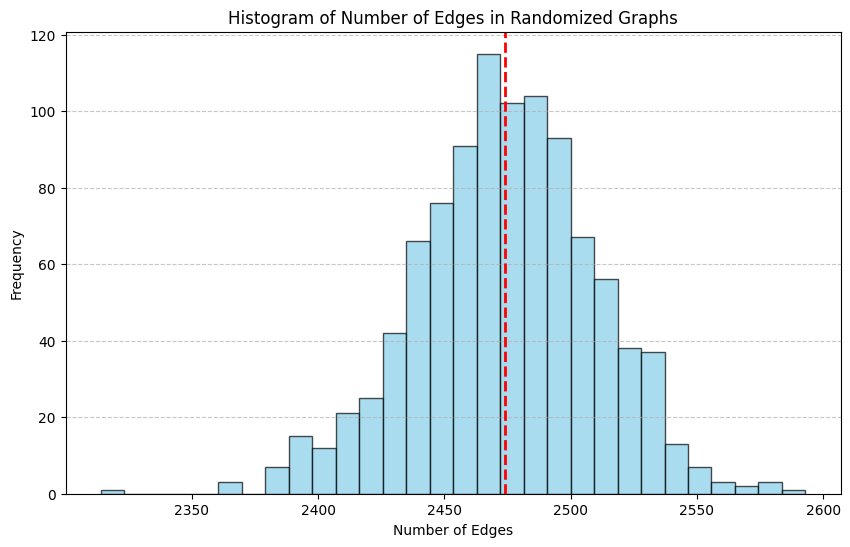

In [29]:
num_of_trials = 1000
num_of_edges = []
n = 100
p = 0.5
for _ in range(num_of_trials):
    graph = randomize_erm_with_random_edge_count_undirected(n, p)
    edges = 0
    for node in range(n):
        edges += len(graph[node])
    edges //= 2
    num_of_edges.append(edges)

mean_edges = np.mean(num_of_edges)

# Create a histogram
plt.figure(figsize=(10, 6))
plt.hist(num_of_edges, bins=30, color="skyblue", edgecolor="black", alpha=0.7)
plt.axvline(mean_edges, color="red", linestyle="--", linewidth=2, label=f"Mean: {mean_edges:.2f}")
plt.title("Histogram of Number of Edges in Randomized Graphs")
plt.xlabel("Number of Edges")
plt.ylabel("Frequency")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

